In [4]:
import matplotlib.pyplot as plt

import Framework.Confounder_Injection as CI
import Framework.Models as Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import torch
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt
import time
from ray import tune
from ray.tune.schedulers import ASHAScheduler
from torch import nn
from ray.tune import CLIReporter
import wandb
import datetime


In [5]:
params = [
    [[1, 4], [3, 6]], # real feature
    [[10, 12], [20, 22]] # confounder
]

# De-correlated confounders in target- and test-data

In [6]:
e = datetime.datetime.now()

search_space = {
    "model":None,
    "device":"cuda",
    "loss_fn":nn.CrossEntropyLoss(),
    "epochs":500,
    "batch_size": tune.choice([32,64,128,256]),
    "optimizer":torch.optim.Adam,

    "alpha":tune.uniform(0,1),
    "lr": tune.loguniform(1e-5,1e-1),
    "weight_decay": tune.loguniform(1e-5,1e-1),
    "wandb": {
        "api_key": "10dd47062950e00af63d29317ead0331316732ff",
        "entity": "confounder_in_ml",
        "project": "Hyperparameters",
        "tags": [f"{e.day}.{e.month}.{e.year} {e.hour}:{e.minute}:{e.second}"]
    },
}
max_t = 500
samples = 30
target_domain_samples = 16


In [7]:
def plot_analysis(analysis):
    dfs = analysis.trial_dataframes
    ax = None  # This plots everything on the same plot
    for d in dfs.values():
        ax = d.mean_accuracy.plot(ax=ax, legend=False)

# BrNet

In [8]:
c = CI.confounder()
model = Models.Br_Net()
search_space["model"] = model
search_space["wandb"]["group"] = "BrNet"

c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=target_domain_samples, target_domain_confounding=1, train_confounding=1, test_confounding=[1], de_correlate_confounder_target=True, de_correlate_confounder_test=True, params=params)

reporter = CLIReporter(max_progress_rows=1, max_report_frequency=120)
analysis = tune.run(c.train_tune,num_samples=samples, progress_reporter=reporter, config=search_space, scheduler=ASHAScheduler(metric="mean_accuracy", mode="max", max_t=max_t))

2022-07-15 13:02:41,857	INFO registry.py:91 -- Detected unknown callable for trainable. Converting to class.
2022-07-15 13:02:41,858	WARNING function_runner.py:603 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.
2022-07-15 13:02:45,113	WARNING worker.py:1404 -- Warning: The actor ImplicitFunc is very large (16 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.
(ImplicitFunc pid=4097570) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin


== Status ==
Current time: 2022-07-15 13:02:53 (running for 00:00:10.95)
Memory usage on this node: 19.0/30.5 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 256.000: None | Iter 64.000: None | Iter 16.000: None | Iter 4.000: None | Iter 1.000: None
Resources requested: 1.0/16 CPUs, 0/0 GPUs, 0.0/10.1 GiB heap, 0.0/5.05 GiB objects
Result logdir: /home/raffi/ray_results/train_tune_2022-07-15_13-02-42
Number of trials: 17/30 (16 PENDING, 1 RUNNING)
+------------------------+----------+------------------------+----------+--------------+-----------+----------------+
| Trial name             | status   | loc                    |    alpha |   batch_size |        lr |   weight_decay |
|------------------------+----------+------------------------+----------+--------------+-----------+----------------|
| train_tune_a5dc3_00000 | RUNNING  | 192.168.178.26:4097570 | 0.281227 |          128 | 0.0441387 |     0.00277457 |
| train_tune_a5dc3_00001 | PENDING  |                        | 0.45186

(ImplicitFunc pid=4097570) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097570) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00000_0_alpha=0.2812,batch_size=128,lr=0.0441,weight_decay=0.0028_2022-07-15_13-02-44/wandb/run-20220715_130248-a5dc3_00000
(ImplicitFunc pid=4097570) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4097570) wandb: Syncing run train_tune_a5dc3_00000
(ImplicitFunc pid=4097570) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4097570) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/a5dc3_00000


Result for train_tune_a5dc3_00000:
  date: 2022-07-15_13-02-53
  done: false
  experiment_id: e74201f14f3c4c96861748424ec5ae72
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.515625
  node_ip: 192.168.178.26
  pid: 4097570
  time_since_restore: 0.15683531761169434
  time_this_iter_s: 0.15683531761169434
  time_total_s: 0.15683531761169434
  timestamp: 1657882973
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a5dc3_00000
  warmup_time: 5.04478120803833
  
Result for train_tune_a5dc3_00000:
  date: 2022-07-15_13-03-01
  done: false
  experiment_id: e74201f14f3c4c96861748424ec5ae72
  hostname: fedora
  iterations_since_restore: 13
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4097570
  time_since_restore: 8.7381591796875
  time_this_iter_s: 0.4031403064727783
  time_total_s: 8.7381591796875
  timestamp: 1657882981
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: a5dc3_00000
  warmup_time: 5.04478120803833
  


(ImplicitFunc pid=4097717) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4097718) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4097720) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4097724) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4097726) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4097742) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4097758) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4097825) wandb: Currently logg

Result for train_tune_a5dc3_00000:
  date: 2022-07-15_13-03-07
  done: false
  experiment_id: e74201f14f3c4c96861748424ec5ae72
  hostname: fedora
  iterations_since_restore: 33
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4097570
  time_since_restore: 13.994070529937744
  time_this_iter_s: 0.2887086868286133
  time_total_s: 13.994070529937744
  timestamp: 1657882987
  timesteps_since_restore: 0
  training_iteration: 33
  trial_id: a5dc3_00000
  warmup_time: 5.04478120803833
  


(ImplicitFunc pid=4097717) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097717) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00001_1_alpha=0.4519,batch_size=256,lr=0.0013,weight_decay=0.0000_2022-07-15_13-02-53/wandb/run-20220715_130301-a5dc3_00001
(ImplicitFunc pid=4097717) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4097717) wandb: Syncing run train_tune_a5dc3_00001
(ImplicitFunc pid=4097717) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4097717) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/a5dc3_00001
(ImplicitFunc pid=4097720) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097720) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00003_3_alpha=0.6351,batch_size=256,lr=0.0001,weight_decay=0.0040_2022-07-15_13-02-53/wandb/run-

Result for train_tune_a5dc3_00001:
  date: 2022-07-15_13-03-08
  done: true
  experiment_id: f974d5e178984e708c2aed13eaec03e6
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4097717
  time_since_restore: 0.39263367652893066
  time_this_iter_s: 0.39263367652893066
  time_total_s: 0.39263367652893066
  timestamp: 1657882988
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a5dc3_00001
  warmup_time: 6.540901184082031
  
Result for train_tune_a5dc3_00003:
  date: 2022-07-15_13-03-08
  done: true
  experiment_id: f9a23fdb9f9a4c53a8411bfedbdb5583
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4097720
  time_since_restore: 0.43529629707336426
  time_this_iter_s: 0.43529629707336426
  time_total_s: 0.43529629707336426
  timestamp: 1657882988
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a5dc3_00003
  warmup_time: 6.5402421951293945
  
Result for trai

(ImplicitFunc pid=4097724) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097724) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00004_4_alpha=0.5425,batch_size=32,lr=0.0000,weight_decay=0.0261_2022-07-15_13-02-53/wandb/run-20220715_130302-a5dc3_00004
(ImplicitFunc pid=4097724) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4097724) wandb: Syncing run train_tune_a5dc3_00004
(ImplicitFunc pid=4097724) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4097724) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/a5dc3_00004


Result for train_tune_a5dc3_00018:
  date: 2022-07-15_13-03-09
  done: true
  experiment_id: f974d5e178984e708c2aed13eaec03e6
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4097717
  time_since_restore: 0.3575561046600342
  time_this_iter_s: 0.3575561046600342
  time_total_s: 0.3575561046600342
  timestamp: 1657882989
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a5dc3_00018
  warmup_time: 6.540901184082031
  
Result for train_tune_a5dc3_00017:
  date: 2022-07-15_13-03-09
  done: false
  experiment_id: f9a23fdb9f9a4c53a8411bfedbdb5583
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5126953125
  node_ip: 192.168.178.26
  pid: 4097720
  time_since_restore: 0.45152878761291504
  time_this_iter_s: 0.45152878761291504
  time_total_s: 0.45152878761291504
  timestamp: 1657882989
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a5dc3_00017
  warmup_time: 6.5402421951293945
  
Result f

(ImplicitFunc pid=4097726) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097726) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00005_5_alpha=0.5193,batch_size=64,lr=0.0382,weight_decay=0.0008_2022-07-15_13-02-53/wandb/run-20220715_130303-a5dc3_00005
(ImplicitFunc pid=4097726) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4097726) wandb: Syncing run train_tune_a5dc3_00005
(ImplicitFunc pid=4097726) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4097726) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/a5dc3_00005
(ImplicitFunc pid=4097742) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097742) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00006_6_alpha=0.9238,batch_size=128,lr=0.0001,weight_decay=0.0032_2022-07-15_13-02-54/wandb/run-2

Result for train_tune_a5dc3_00021:
  date: 2022-07-15_13-03-10
  done: true
  experiment_id: f974d5e178984e708c2aed13eaec03e6
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4097717
  time_since_restore: 0.41509175300598145
  time_this_iter_s: 0.41509175300598145
  time_total_s: 0.41509175300598145
  timestamp: 1657882990
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a5dc3_00021
  warmup_time: 6.540901184082031
  
Result for train_tune_a5dc3_00022:
  date: 2022-07-15_13-03-10
  done: true
  experiment_id: 886682e341fd4bc9b7280fa7914ca98b
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4097724
  time_since_restore: 0.3964207172393799
  time_this_iter_s: 0.3964207172393799
  time_total_s: 0.3964207172393799
  timestamp: 1657882990
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a5dc3_00022
  warmup_time: 6.743957996368408
  
Result for train_tu

(ImplicitFunc pid=4097825) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097825) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00009_9_alpha=0.8239,batch_size=128,lr=0.0010,weight_decay=0.0026_2022-07-15_13-02-54/wandb/run-20220715_130304-a5dc3_00009
(ImplicitFunc pid=4097825) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4097825) wandb: Syncing run train_tune_a5dc3_00009
(ImplicitFunc pid=4097825) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4097825) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/a5dc3_00009
(ImplicitFunc pid=4097783) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097783) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00008_8_alpha=0.5512,batch_size=128,lr=0.0001,weight_decay=0.0001_2022-07-15_13-02-54/wandb/run-

Result for train_tune_a5dc3_00024:
  date: 2022-07-15_13-03-11
  done: false
  experiment_id: 886682e341fd4bc9b7280fa7914ca98b
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4097724
  time_since_restore: 0.7989280223846436
  time_this_iter_s: 0.7989280223846436
  time_total_s: 0.7989280223846436
  timestamp: 1657882991
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a5dc3_00024
  warmup_time: 6.743957996368408
  
Result for train_tune_a5dc3_00025:
  date: 2022-07-15_13-03-11
  done: true
  experiment_id: f9e049b1ba00414cb3fa3d598294afca
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4097742
  time_since_restore: 0.564786434173584
  time_this_iter_s: 0.564786434173584
  time_total_s: 0.564786434173584
  timestamp: 1657882991
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a5dc3_00025
  warmup_time: 7.596203327178955
  
Result for train

(ImplicitFunc pid=4097840) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097840) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00010_10_alpha=0.0854,batch_size=32,lr=0.0007,weight_decay=0.0000_2022-07-15_13-02-55/wandb/run-20220715_130304-a5dc3_00010
(ImplicitFunc pid=4097840) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4097840) wandb: Syncing run train_tune_a5dc3_00010
(ImplicitFunc pid=4097840) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4097840) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/a5dc3_00010


Result for train_tune_a5dc3_00027:
  date: 2022-07-15_13-03-12
  done: true
  experiment_id: f9e049b1ba00414cb3fa3d598294afca
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4097742
  time_since_restore: 0.6909351348876953
  time_this_iter_s: 0.6909351348876953
  time_total_s: 0.6909351348876953
  timestamp: 1657882992
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a5dc3_00027
  warmup_time: 7.596203327178955
  


(ImplicitFunc pid=4097885) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097885) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00011_11_alpha=0.8131,batch_size=256,lr=0.0008,weight_decay=0.0101_2022-07-15_13-02-55/wandb/run-20220715_130305-a5dc3_00011
(ImplicitFunc pid=4097885) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4097885) wandb: Syncing run train_tune_a5dc3_00011
(ImplicitFunc pid=4097885) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4097885) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/a5dc3_00011
(ImplicitFunc pid=4097900) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097900) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00012_12_alpha=0.3260,batch_size=32,lr=0.0001,weight_decay=0.0916_2022-07-15_13-02-55/wandb/run

Result for train_tune_a5dc3_00000:
  date: 2022-07-15_13-03-12
  done: false
  experiment_id: e74201f14f3c4c96861748424ec5ae72
  hostname: fedora
  iterations_since_restore: 44
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4097570
  time_since_restore: 19.700124502182007
  time_this_iter_s: 0.7848775386810303
  time_total_s: 19.700124502182007
  timestamp: 1657882992
  timesteps_since_restore: 0
  training_iteration: 44
  trial_id: a5dc3_00000
  warmup_time: 5.04478120803833
  


(ImplicitFunc pid=4097948) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097948) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00014_14_alpha=0.5487,batch_size=32,lr=0.0002,weight_decay=0.0030_2022-07-15_13-02-56/wandb/run-20220715_130305-a5dc3_00014
(ImplicitFunc pid=4097948) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4097948) wandb: Syncing run train_tune_a5dc3_00014
(ImplicitFunc pid=4097948) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4097948) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/a5dc3_00014
(ImplicitFunc pid=4097970) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097970) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00015_15_alpha=0.5141,batch_size=128,lr=0.0004,weight_decay=0.0000_2022-07-15_13-02-56/wandb/run

Result for train_tune_a5dc3_00010:
  date: 2022-07-15_13-03-13
  done: false
  experiment_id: 2ae75b948bda4fe0a5153f96daf6bbac
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4097840
  time_since_restore: 1.054917573928833
  time_this_iter_s: 1.054917573928833
  time_total_s: 1.054917573928833
  timestamp: 1657882993
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a5dc3_00010
  warmup_time: 8.125523328781128
  
Result for train_tune_a5dc3_00011:
  date: 2022-07-15_13-03-13
  done: false
  experiment_id: e83a48ebaa8e42638a03c1a7e83731b7
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4097885
  time_since_restore: 0.867375373840332
  time_this_iter_s: 0.867375373840332
  time_total_s: 0.867375373840332
  timestamp: 1657882993
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a5dc3_00011
  warmup_time: 8.289581775665283
  
Result for train_tune_a5dc

2022-07-15 13:03:17,063	WARNING tune.py:682 -- Stop signal received (e.g. via SIGINT/Ctrl+C), ending Ray Tune run. This will try to checkpoint the experiment state one last time. Press CTRL+C (or send SIGINT/SIGKILL/SIGTERM) to skip. 


Result for train_tune_a5dc3_00013:
  date: 2022-07-15_13-03-17
  done: true
  experiment_id: af5e9a0e4a4f4343ba50ac4ebf394bc7
  hostname: fedora
  iterations_since_restore: 4
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4097929
  time_since_restore: 4.271001815795898
  time_this_iter_s: 1.0017786026000977
  time_total_s: 4.271001815795898
  timestamp: 1657882997
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: a5dc3_00013
  warmup_time: 8.19777774810791
  
== Status ==
Current time: 2022-07-15 13:03:17 (running for 00:00:35.21)
Memory usage on this node: 23.2/30.5 GiB
Using AsyncHyperBand: num_stopped=19
Bracket: Iter 256.000: None | Iter 64.000: None | Iter 16.000: 0.519287109375 | Iter 4.000: 0.5 | Iter 1.000: 0.5
Resources requested: 11.0/16 CPUs, 0/0 GPUs, 0.0/10.1 GiB heap, 0.0/5.05 GiB objects
Result logdir: /home/raffi/ray_results/train_tune_2022-07-15_13-02-42
Number of trials: 30/30 (11 RUNNING, 19 TERMINATED)
+------------------------+--------

(train_tune pid=4097840) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4097840) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4097840) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4097840) wandb: | 0.001 MB of 0.010 MB uploaded (0.000 MB deduped)
(train_tune pid=4097840) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4097840) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4097929) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4097929) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4097840) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4097840) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4097840) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4097840) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tun

{'model': Br_Net(
   (linear_relu_stack): Sequential(
     (0): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1))
     (1): Tanh()
     (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (3): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1))
     (4): Tanh()
     (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (6): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
     (7): Tanh()
     (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (9): Flatten(start_dim=1, end_dim=-1)
     (10): Linear(in_features=32, out_features=2, bias=True)
   )
 ),
 'device': 'cuda',
 'loss_fn': CrossEntropyLoss(),
 'epochs': 500,
 'batch_size': 64,
 'optimizer': torch.optim.adam.Adam,
 'alpha': 0.15324292247998827,
 'lr': 0.03025771985054879,
 'weight_decay': 0.00017856909813850796,
 'wandb': {'api_key': '10dd47062950e00af63d29317ead0331316732ff',
  'entity': 'confounder_in_ml',
  'project': 'Hyperparameters',


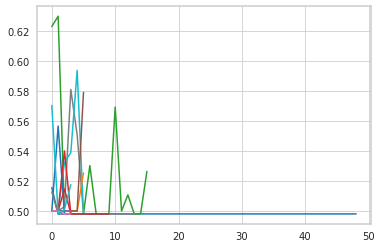

In [9]:
plot_analysis(analysis)
analysis.get_best_config(metric="mean_accuracy", mode="max", scope="last-10-avg")

# BrNet_CF_free

In [ ]:
c = CI.confounder()
model = Models.Br_Net_CF_free(alpha=None)
search_space["model"] = model
search_space["wandb"]["group"] = "BrNet CF free"

c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=target_domain_samples, target_domain_confounding=1, train_confounding=1, test_confounding=[1], de_correlate_confounder_target=True, de_correlate_confounder_test=True, params=params)

reporter = CLIReporter(max_progress_rows=1, max_report_frequency=120)
analysis = tune.run(c.train_tune,num_samples=samples, progress_reporter=reporter, config=search_space, scheduler=ASHAScheduler(metric="mean_accuracy", mode="max", max_t=max_t))

2022-07-15 13:03:25,134	INFO registry.py:91 -- Detected unknown callable for trainable. Converting to class.
2022-07-15 13:03:28,038	WARNING worker.py:1404 -- Warning: The actor ImplicitFunc is very large (16 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.


In [ ]:
plot_analysis(analysis)
analysis.get_best_config(metric="mean_accuracy", mode="max", scope="last-10-avg")

# BrNet_CF_free_conditioned

In [ ]:
c = CI.confounder()
model = Models.Br_Net_CF_free(alpha=None)
search_space["model"] = model
search_space["wandb"]["group"] = "BrNet CF free conditioned"

c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=target_domain_samples, target_domain_confounding=1, train_confounding=1, test_confounding=[1], de_correlate_confounder_target=True, de_correlate_confounder_test=True, params=params, conditioning=0)

reporter = CLIReporter(max_progress_rows=1, max_report_frequency=120)
analysis = tune.run(c.train_tune,num_samples=samples, progress_reporter=reporter, config=search_space, scheduler=ASHAScheduler(metric="mean_accuracy", mode="max", max_t=max_t))

In [ ]:
plot_analysis(analysis)
analysis.get_best_config(metric="mean_accuracy", mode="max", scope="last-10-avg")
#analysis.best_dataframe(metric="mean_accuracy", mode="max", scope="last-10-avg").plot()

# BrNet_DANN

In [ ]:
c = CI.confounder()
model = Models.Br_Net_DANN(alpha=None)
search_space["model"] = model
search_space["wandb"]["group"] = "BrNet DANN"

c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=target_domain_samples, target_domain_confounding=1, train_confounding=1, test_confounding=[1], de_correlate_confounder_target=True, de_correlate_confounder_test=True, params=params)

reporter = CLIReporter(max_progress_rows=1, max_report_frequency=120)
analysis = tune.run(c.train_tune,num_samples=samples, progress_reporter=reporter, config=search_space, scheduler=ASHAScheduler(metric="mean_accuracy", mode="max", max_t=max_t))

In [ ]:
plot_analysis(analysis)
analysis.get_best_config(metric="mean_accuracy", mode="max", scope="last-10-avg")